In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
xen = np.linspace(0,10000,1000) #AA

In [5]:
E0 = 1.570*10**6 #eV
e2 = 14.4 #eV*AA
Z1 = 2
N = 6.02*10**(-2) #Al #particles/AA**3
Z2K = 70 
Z2C = 13 #30
M1 = 4 #u
me = 0.0005485 #u
I = 10*Z2C #eV
theta = 162*np.pi/180 #radians
M1 = 4
M2 = 173#39
K = ((np.sqrt(M2**2-M1**2 *np.sin(theta)**2) + M1*np.sin(theta))/(M1+M2))**2

In [6]:
E0 = 1.570*10**6 #eV
e2 = 14.4 #eV*AA
Z1 = 2
N = 17.6*10**(-2) #Al #particles/AA**3
Z2K = 19
Z2C = 6
M1 = 4 #u
me = 0.0005485 #u
I = 10*Z2C #eV
theta = 162*np.pi/180 #radians
M1 = 4
M2 = 39
K = ((np.sqrt(M2**2-M1**2 *np.sin(theta)**2) + M1*np.sin(theta))/(M1+M2))**2

Text(0, 0.5, 'dE/dx [eV/AA]')

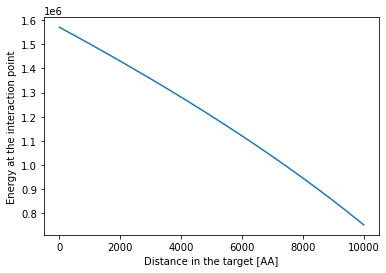

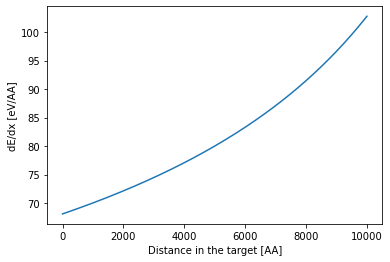

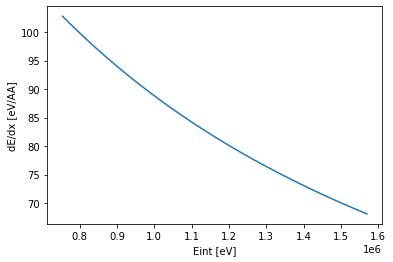

In [7]:
Eint = [E0]
dE_dxen = []
for ii in range(len(xen)):
    if ii!=0:
        Eprev = Eint[-1]
        dE_dx = e2**2 *Z1**2 *2*np.pi*N*Z2C/(Eprev) *M1/(me) *np.log(4*me/(M1) * Eprev/I) # eV/AA = (eV*AA)**2 * 1/(AA**3) *1/eV *log(eV/eV)
        dE_dxen.append(dE_dx)
        Enew = Eprev - dE_dx * (xen[ii]-xen[ii-1])
        Eint.append(Enew)
Eint = np.array(Eint)
plt.plot(xen, Eint)
plt.xlabel('Distance in the target [AA]')
plt.ylabel('Energy at the interaction point') 
plt.figure()
plt.plot(xen[0:-1], dE_dxen)
plt.xlabel('Distance in the target [AA]')
plt.ylabel('dE/dx [eV/AA]') 
plt.figure()
plt.plot(Eint[0:-1], dE_dxen)
plt.xlabel('Eint [eV]')
plt.ylabel('dE/dx [eV/AA]') 

Text(0, 0.5, 'Sigma')

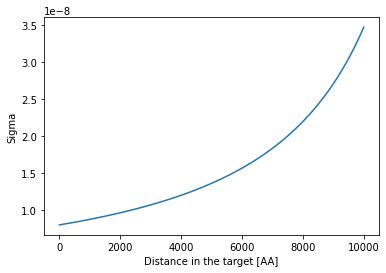

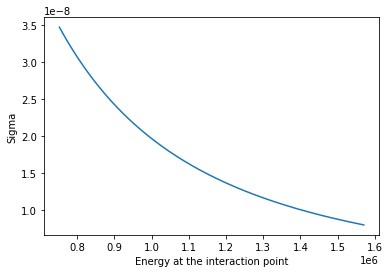

In [8]:
sigma = (e2*Z1*Z2K/(4*Eint))**2 *1/(np.sin(theta/2))**4
plt.plot(xen,sigma)
plt.xlabel('Distance in the target [AA]')
plt.ylabel('Sigma')
plt.figure()
plt.plot(Eint,sigma)
plt.xlabel('Energy at the interaction point')
plt.ylabel('Sigma')

In [9]:
Eint[-1]*K

658431.218644772

In [10]:
Emeas = []
for ii in range(len(xen)): #iteration over the depths that we plot
    Estart = Eint[ii]*K
    Eprev = Estart
    xenstep = np.linspace(0,xen[ii]/np.abs(np.cos(theta)),1000)
    for jj in range(len(xenstep)): #iteration to determine the energy that is measured for one specific start depth
        if jj !=0:
            dE_dx = e2**2 *Z1**2 *np.pi*N*Z2C/(Eprev) *M1/(me) *np.log(4*me/(M1) * Eprev/I) # eV/AA = (eV*AA)**2 * 1/(AA**3) *1/eV *log(eV/eV)
            Eprev = Eprev - np.abs(dE_dx) * (xenstep[jj]-xenstep[jj-1])
    Emeas.append(Eprev)
Emeas = np.array(Emeas) 

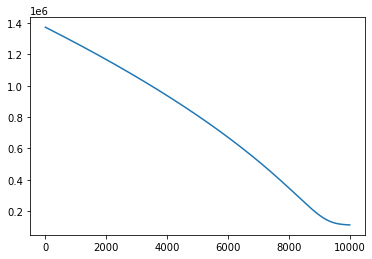

In [11]:
plt.plot(xen,Emeas)

In [12]:
print(xen[151])
print(xen[255])
print(xen[351])
print(xen[455])

1511.5115115115116
2552.5525525525527
3513.5135135135133
4554.554554554555


0.0010929478638852588
0.001545222657030711


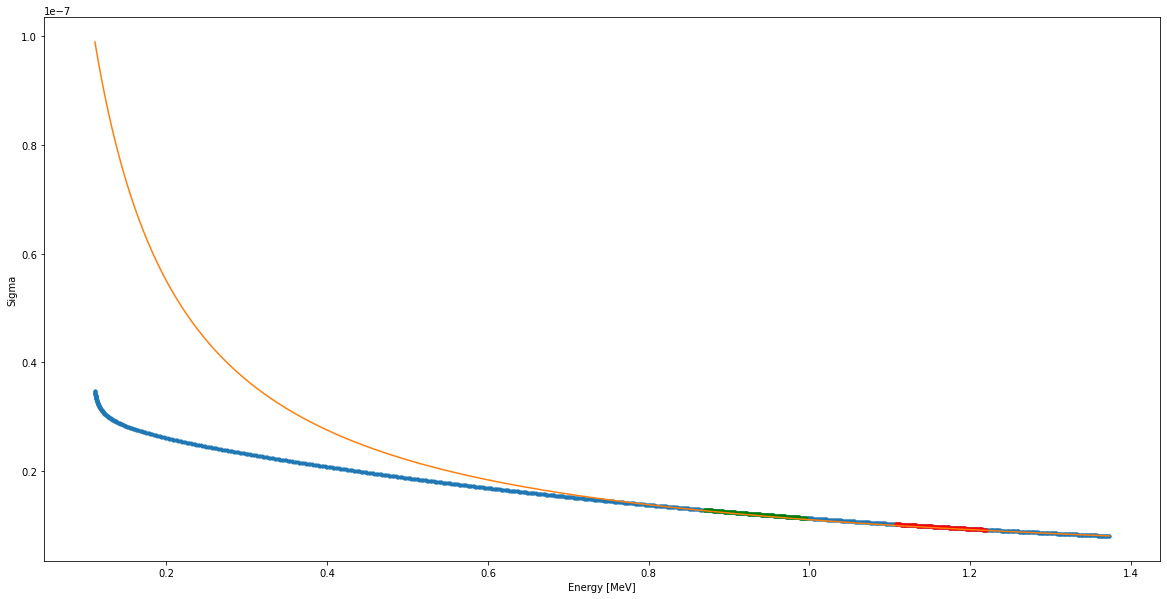

In [16]:
plt.figure(figsize = (20,10))
xindex1 = np.arange(151,255,1)
xindex2 = np.arange(351,455,1)

plt.plot(Emeas/10**6, sigma,'.')
plt.plot(Emeas[xindex1]/10**6, sigma[xindex1],'r.')
plt.plot(Emeas[xindex2]/10**6, sigma[xindex2],'g.')
plt.xlabel('Energy [MeV]')
plt.ylabel('Sigma')
int1 = 0
for ii in xindex1:
    yval = (sigma[ii])
    xr = abs((Emeas[ii])-(Emeas[ii-1]))/2 + abs((Emeas[ii+1])-(Emeas[ii]))/2
    int1+= yval*xr

int2 = 0
for ii in xindex2:
    yval = (sigma[ii])
    xr = abs((Emeas[ii])-(Emeas[ii-1]))/2 + abs((Emeas[ii+1])-(Emeas[ii]))/2
    int2+= yval*xr
#plt.plot(Emeas/10**6, 0.000000005/(Emeas/10**6)**2)

print(int1)
print(int2)

plt.plot(Emeas/10**6, 1.25*0.88*10**-2/(Emeas)) #indeed, we see a 1/measured energy behavior in the energy region where we are interested in

In [13]:
xen[55]

550.5505505505505

In [17]:
I1 = (-Emeas[5]+Emeas[0])*(sigma[5]+sigma[0])/2
print(I1)
I2 = (-Emeas[55]+Emeas[50])*(sigma[55]+sigma[50])/2
print(I2)


3.943226665293635e-05
4.215761922745642e-05
